In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
# charges, age and bmi are continuous columns
# rest others are discrete

In [7]:
df["insuranceclaim"].value_counts()
# imbalanced data, model will get train more on insurance claimed

insuranceclaim
1    783
0    555
Name: count, dtype: int64

In [8]:
df["sex"].value_counts()
# data regarding both the genders are almost equal

sex
1    676
0    662
Name: count, dtype: int64

In [9]:
df["children"].value_counts()
# maximum data we have is of no children, minimum data of parents with children 5

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [10]:
df["smoker"].value_counts()	
# so we have more data of non-smokers than smokers

smoker
0    1064
1     274
Name: count, dtype: int64

In [11]:
df["region"].value_counts()
# region wise data distribution is almost same

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [12]:
# next finding duplicate rows
df.duplicated().sum()

1

In [13]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [14]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='insuranceclaim', ylabel='count'>

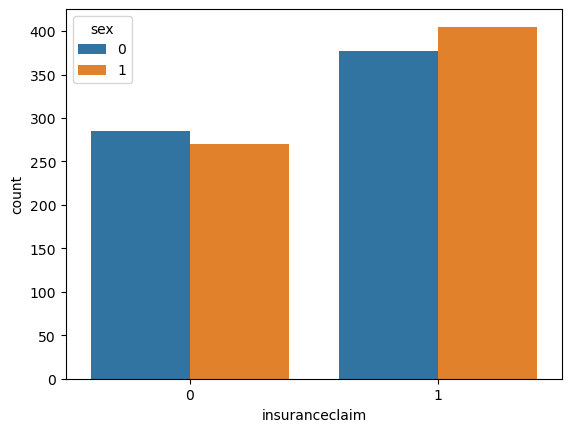

In [15]:
sns.countplot(data=df,x="insuranceclaim",hue="sex")

<Axes: xlabel='insuranceclaim', ylabel='count'>

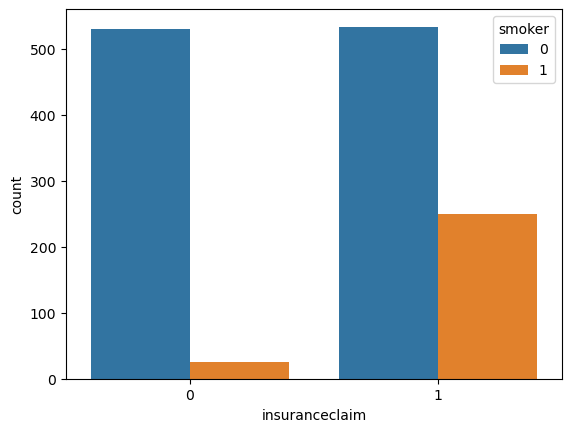

In [16]:
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
# imp column

<Axes: xlabel='insuranceclaim', ylabel='count'>

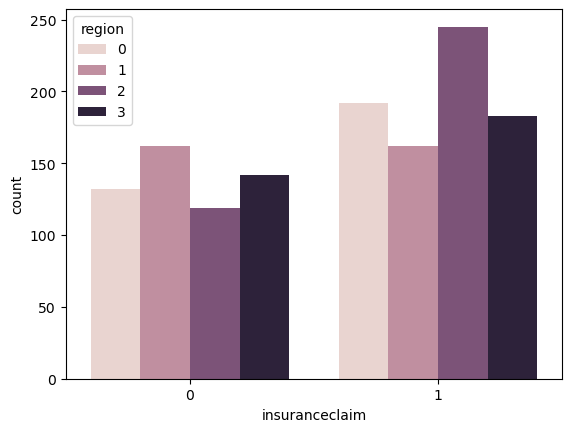

In [17]:
sns.countplot(data=df,x="insuranceclaim",hue="region")

<Axes: xlabel='insuranceclaim', ylabel='count'>

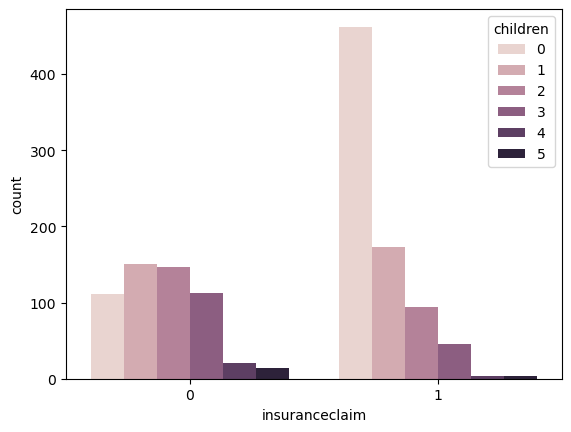

In [18]:
sns.countplot(data=df,x="insuranceclaim",hue="children")
# imp col

<Axes: xlabel='age', ylabel='insuranceclaim'>

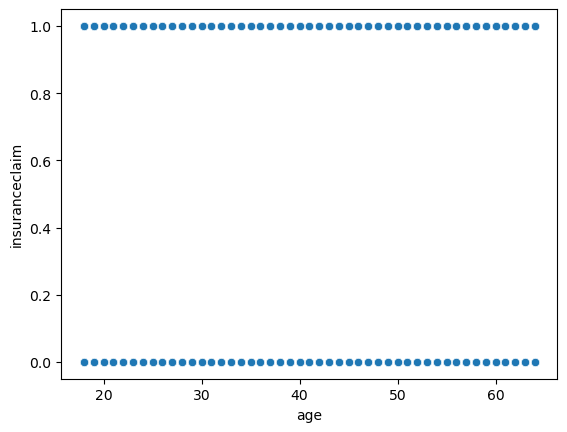

In [19]:
sns.scatterplot(data=df,y="insuranceclaim",x="age")
# age is not adding anything in knowledge increment

<Axes: xlabel='bmi', ylabel='insuranceclaim'>

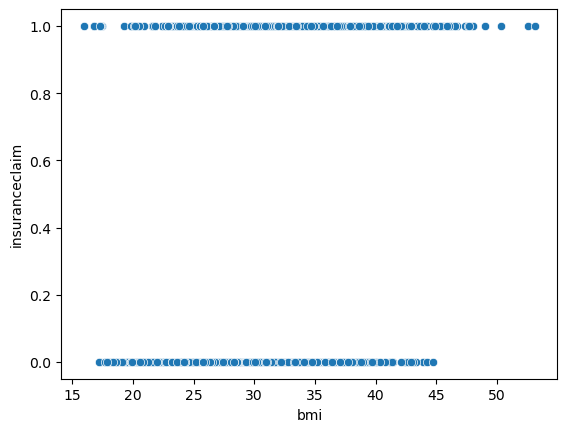

In [20]:
sns.scatterplot(data=df,y="insuranceclaim",x="bmi")
# imp col

<Axes: xlabel='charges', ylabel='insuranceclaim'>

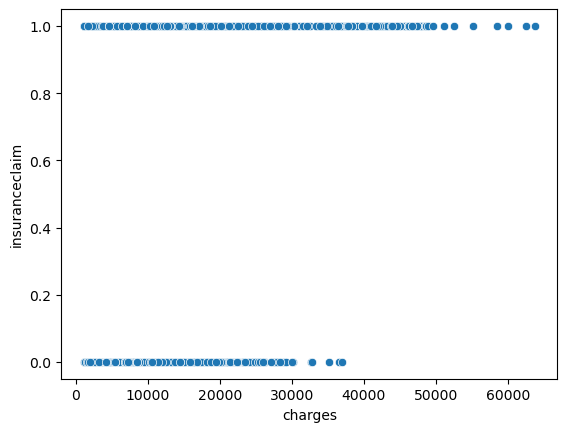

In [21]:
sns.scatterplot(data=df,y="insuranceclaim",x="charges")
# imp col

In [22]:
#features=df[["sex","children","smoker","region","charges","bmi"]]# 	bmi	children	smoker	region	charges
features=df.drop(["age","insuranceclaim"],axis=1)
target=df["insuranceclaim"]

In [23]:
from sklearn.model_selection import train_test_split
# putting stratify because target is imbalanced. 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.25,stratify=target)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((1002, 6), (1002,))
Testing data : ((335, 6), (335,))


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy of Model : {ac}\nConfusion Matrix : \n{cm}\nClassification Report : \n{cr}")

Accuracy of Model : 0.8298507462686567
Confusion Matrix : 
[[105  34]
 [ 23 173]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       139
           1       0.84      0.88      0.86       196

    accuracy                           0.83       335
   macro avg       0.83      0.82      0.82       335
weighted avg       0.83      0.83      0.83       335



In [52]:
features=df.drop("insuranceclaim",axis=1)
target=df["insuranceclaim"]
from sklearn.model_selection import train_test_split
# putting stratify because target is imbalanced. 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.25,stratify=target)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((1002, 7), (1002,))
Testing data : ((335, 7), (335,))


In [164]:
from sklearn.decomposition import PCA
pc=PCA(n_components=3)

In [166]:
xtrain_pc=pc.fit_transform(xtrain)
xtest_pc=pc.transform(xtest)

In [167]:
print(f"Training data : {xtrain_pc.shape, ytrain.shape}" )
print(f"Testing data : {xtest_pc.shape, ytest.shape}" )

Training data : ((1002, 3), (1002,))
Testing data : ((335, 3), (335,))


In [168]:
lr=LogisticRegression()
lr.fit(xtrain_pc,ytrain)
ypred=lr.predict(xtest_pc)

In [172]:
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy of Model : {ac}\nConfusion Matrix : \n{cm}\nClassification Report : \n{cr}")

Accuracy of Model : 0.7313432835820896
Confusion Matrix : 
[[ 83  56]
 [ 34 162]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       139
           1       0.74      0.83      0.78       196

    accuracy                           0.73       335
   macro avg       0.73      0.71      0.72       335
weighted avg       0.73      0.73      0.73       335



In [174]:
pc.explained_variance_ratio_

array([9.99998487e-01, 1.24568778e-06, 2.47422472e-07])

In [176]:
from sklearn.feature_selection import SelectKBest, chi2

In [180]:
chi=SelectKBest(score_func=chi2,k=4)
xtrain_chi=chi.fit_transform(xtrain,ytrain)
xtest_chi=chi.transform(xtest)
print(chi.get_support())
print(features.columns)
lr=LogisticRegression()
lr.fit(xtrain_chi,ytrain)
ypred=lr.predict(xtest_chi)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy of Model : {ac}\nConfusion Matrix : \n{cm}\nClassification Report : \n{cr}")



[ True False  True  True False False  True]
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Accuracy of Model : 0.8716417910447761
Confusion Matrix : 
[[115  24]
 [ 19 177]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       139
           1       0.88      0.90      0.89       196

    accuracy                           0.87       335
   macro avg       0.87      0.87      0.87       335
weighted avg       0.87      0.87      0.87       335

